## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier 
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split



## Importing DataFrames

In [2]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_cluster = pd.read_csv('./data/cluster.csv')
df_original = pd.read_csv('./data/incidents.csv')

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,15,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
### Dropping unnecessary columns

In [4]:
#df = df.drop(columns= ['Unique ID', 'description'])
df_test_mod = df_test.drop(columns= ['Unique ID', 'description', 'Race'])

In [5]:
### Checking training dataframe shape

In [6]:
df.shape

(19628, 273)

In [7]:
### Checking testing dataframe shape

In [8]:
df_test.shape

(6379, 273)

In [9]:
df_test.head()

,Unique ID,Age,year,month,week_of_year,day_of_month,day_of_week,day_of_year,pop2000,pop2010,...,Intended use of force (Developing)_Vehicle,"Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS_No","Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS_Unknown","Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS_Yes",Agency_multiple_agencies,Agency_other,Agency_police,Agency_sheriff,description,Race
0,2.0,53.0,2000.0,1.0,1.0,2.0,6.0,2.0,665865.0,691893,...,0,1,0,0,0,0,0,1,"Darren Mayfield, a DeKalb County sheriff's dep...",Race unspecified
1,3.0,23.0,2000.0,1.0,1.0,5.0,2.0,5.0,39678.0,38950,...,0,1,0,0,0,0,1,0,Officer Elias E. Mendiola shot Derrick E. Tate...,Race unspecified
2,7.0,23.0,2000.0,1.0,1.0,6.0,3.0,6.0,695454.0,919628,...,0,1,0,0,1,0,0,0,State troopers and county deputies had tracked...,Race unspecified
3,8.0,31.0,2000.0,1.0,1.0,6.0,3.0,6.0,1709434.0,2035210,...,0,0,1,0,1,0,0,0,SWAT officers shot and killed Adrian Dolby sho...,Race unspecified
4,10.0,28.0,2000.0,1.0,1.0,7.0,4.0,7.0,9519338.0,9818605,...,0,0,1,0,0,0,1,0,Joseph Gumpert stopped breathing after a scuff...,Race unspecified


In [10]:
### Retreiving baseline score from normalized value counts from race variable 

In [11]:
df['Race'].value_counts(normalize=True)

European-American/White    0.475596
African-American/Black     0.316334
Hispanic/Latino            0.176075
Asian/Pacific Islander     0.018035
Native American/Alaskan    0.012686
Middle Eastern             0.001274
Name: Race, dtype: float64

In [12]:
### Creating dataframe from normalized value counts of race variable

In [13]:
df_vals = pd.DataFrame(df['Race'].value_counts(normalize=True))

In [14]:
### Visualizing normalized value counts of race variable

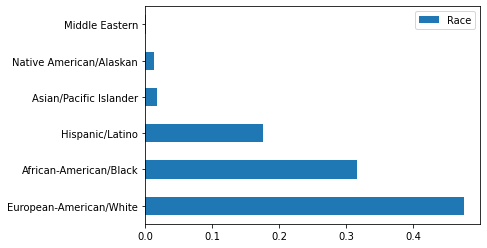

In [15]:
df_vals.plot.barh();

In [16]:
### Creating X and y

In [17]:
X = df.drop(columns = ['Race', 'Unique ID', 'description'])
y = df['Race']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [19]:
### Scaling data

In [20]:
sc = StandardScaler()
Xsc_train = sc.fit_transform(X_train)
Xsc_test = sc.transform(X_test)

In [21]:
### Instantiating logistic regression

In [22]:
logreg = LogisticRegression(max_iter=50000)

In [23]:
### Fitting logisitic regression on training data

In [24]:
logreg.fit(Xsc_train, y_train)

LogisticRegression(max_iter=50000)

### Accuracy scores for training and testing data

In [25]:
logreg.score(Xsc_train, y_train)

0.8233815637524625

In [26]:
logreg.score(Xsc_test, y_test)

0.8029345832484206

### Getting predicitons on testing data (wihtin the training set)

In [27]:
y_preds = logreg.predict(Xsc_test)

In [28]:
train_set_preds = pd.DataFrame(y_preds)

In [29]:
train_set_probs = logreg.predict_proba(Xsc_test)

In [30]:
train_set_probs = pd.DataFrame(train_set_probs)

In [31]:
train_set_probs = pd.DataFrame(train_set_probs.apply(max, axis = 1)) #second column

In [32]:
train_set_probs

,0
0,0.386531
1,0.483632
2,0.936873
3,0.622313
4,0.632706
...,...
4902,0.744312
4903,0.980879
4904,0.574908
4905,0.982463


## Logistic Regression Predictions on Unlabeled Data

### Examining test data

In [33]:
df_test.head()

,Unique ID,Age,year,month,week_of_year,day_of_month,day_of_week,day_of_year,pop2000,pop2010,...,Intended use of force (Developing)_Vehicle,"Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS_No","Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS_Unknown","Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS_Yes",Agency_multiple_agencies,Agency_other,Agency_police,Agency_sheriff,description,Race
0,2.0,53.0,2000.0,1.0,1.0,2.0,6.0,2.0,665865.0,691893,...,0,1,0,0,0,0,0,1,"Darren Mayfield, a DeKalb County sheriff's dep...",Race unspecified
1,3.0,23.0,2000.0,1.0,1.0,5.0,2.0,5.0,39678.0,38950,...,0,1,0,0,0,0,1,0,Officer Elias E. Mendiola shot Derrick E. Tate...,Race unspecified
2,7.0,23.0,2000.0,1.0,1.0,6.0,3.0,6.0,695454.0,919628,...,0,1,0,0,1,0,0,0,State troopers and county deputies had tracked...,Race unspecified
3,8.0,31.0,2000.0,1.0,1.0,6.0,3.0,6.0,1709434.0,2035210,...,0,0,1,0,1,0,0,0,SWAT officers shot and killed Adrian Dolby sho...,Race unspecified
4,10.0,28.0,2000.0,1.0,1.0,7.0,4.0,7.0,9519338.0,9818605,...,0,0,1,0,0,0,1,0,Joseph Gumpert stopped breathing after a scuff...,Race unspecified


### Scaling test data

In [34]:
df_test_scale = sc.transform(df_test_mod)

### Creating a dataframe for the predictions of the logistic regression

In [35]:
test_set_preds = pd.DataFrame(logreg.predict(df_test_scale))

In [36]:
test_set_preds = test_set_preds.rename(columns= {0:'to_race_imputations'})

### Creating a dataframe for the prediction probabilities from the logistic regression

In [37]:
test_set_probs = logreg.predict_proba(df_test_scale)

In [38]:
test_set_probs = pd.DataFrame(test_set_probs)

In [39]:
test_set_probs = pd.DataFrame(test_set_probs.apply(max, axis = 1)) 

In [40]:
test_set_probs = test_set_probs.rename(columns={0:"to_imputation_probability"})

In [41]:
test_preds_probs = pd.concat((test_set_preds,test_set_probs), axis = 1)

In [42]:
df_new = pd.concat((df_test,test_preds_probs), axis = 1)

In [43]:
df_new = df_new[['Unique ID', 'Race', 'to_race_imputations', 'to_imputation_probability']]

In [44]:
df_new

,Unique ID,Race,to_race_imputations,to_imputation_probability
0,2.0,Race unspecified,African-American/Black,0.536669
1,3.0,Race unspecified,African-American/Black,0.591266
2,7.0,Race unspecified,African-American/Black,0.542160
3,8.0,Race unspecified,European-American/White,0.833870
4,10.0,Race unspecified,European-American/White,0.599186
...,...,...,...,...
6374,29392.0,Race unspecified,European-American/White,0.504457
6375,29410.0,Race unspecified,European-American/White,0.965566
6376,29416.0,Race unspecified,European-American/White,0.993696
6377,29735.0,Race unspecified,Hispanic/Latino,0.950131


In [45]:
test_set_preds.mean()

Series([], dtype: float64)

In [46]:
### Reattaching data pertaining to existing racial imputations and prediction probability 

In [47]:
df_original = df_original[['Unique ID','Race with imputations', 'Imputation probability']]

In [48]:
### Merging datafames and dropping unncessary columns

In [49]:
df1 = pd.merge(df_new, df_original, how = 'left', on = 'Unique ID')

In [50]:
df1 = pd.merge(df1, df_cluster, how = 'left', on = 'Unique ID')
df1 = df1.drop(columns = ['Unnamed: 0'])

In [51]:
### Examining new dataframe 

The dataframe includes our predictions and prediction probabilites, the Fatal Encounter predictions and prediction probabilities, and the results from the KMeans unsupervised learning  model.

In [52]:
df1.head()

,Unique ID,Race,to_race_imputations,to_imputation_probability,Race with imputations,Imputation probability,cluster
0,2.0,Race unspecified,African-American/Black,0.536669,African-American/Black,0.947676492,4
1,3.0,Race unspecified,African-American/Black,0.591266,European-American/White,0.941666075,0
2,7.0,Race unspecified,African-American/Black,0.542160,African-American/Black,0.789100135,3
3,8.0,Race unspecified,European-American/White,0.833870,European-American/White,0.436938034,5
4,10.0,Race unspecified,European-American/White,0.599186,European-American/White,0.680697585,2


## KMeans analyis

### Examining normalized value counts from KMeans model.

Upon just initial examination, we can see that the value counts are do not directly correspond with the true distribution, so we cannot be too confident in the efficacy of our  KMeans model.

In [53]:
df1['cluster'].value_counts(normalize=True)

0    0.310739
3    0.265956
4    0.236862
5    0.116375
1    0.050724
2    0.019345
Name: cluster, dtype: float64

In [54]:
listy = [df1['cluster'], df1['to_race_imputations']]

In [55]:
cluster_analysis = pd.DataFrame(df1.groupby(listy)['Unique ID'].count())

In [56]:
cluster_analysis['cluster2'] = cluster_analysis.index

In [57]:
cluster_analysis.columns

Index(['Unique ID', 'cluster2'], dtype='object')

### Examining racial composition of each cluster

In [58]:
cluster_analysis

Unique ID                      cluster2
cluster to_race_imputations                                             
0       African-American/Black         192   (0, African-American/Black)
        Asian/Pacific Islander           8   (0, Asian/Pacific Islander)
        European-American/White       1743  (0, European-American/White)
        Hispanic/Latino                 89          (0, Hispanic/Latino)
        Native American/Alaskan          8  (0, Native American/Alaskan)
1       African-American/Black          48   (1, African-American/Black)
        Asian/Pacific Islander           4   (1, Asian/Pacific Islander)
        European-American/White        136  (1, European-American/White)
        Hispanic/Latino                141          (1, Hispanic/Latino)
        Native American/Alaskan          4  (1, Native American/Alaskan)
2       African-American/Black          28   (2, African-American/Black)
        Asian/Pacific Islander          11   (2, Asian/Pacific Islander)
        European-American/White         26  (2, European-American/White)
        Hispanic/Latino                 62          (2, Hispanic/Latino)
3       African-American/Black         587   (3, African-American/Black)
        Asian/Pacific Islander          27   (3, Asian/Pacific Islander)
        European-American/White        922  (3, European-American/White)
        Hispanic/Latino                207          (3, Hispanic/Latino)
        Middle Eastern                   1           (3, Middle Eastern)
        Native American/Alaskan          2  (3, Native American/Alaskan)
4       African-American/Black         916   (4, African-American/Black)
        Asian/Pacific Islander           3   (4, Asian/Pacific Islander)
        European-American/White        539  (4, European-American/White)
        Hispanic/Latino                 96          (4, Hispanic/Latino)
        Native American/Alaskan          1  (4, Native American/Alaskan)
5       African-American/Black         265   (5, African-American/Black)
        Asian/Pacific Islander           8   (5, Asian/Pacific Islander)
        European-American/White        266  (5, European-American/White)
        Hispanic/Latino                222          (5, Hispanic/Latino)
        Middle Eastern                   3           (5, Middle Eastern)

### Performance Comparision

Casting the imputation probability as a numeric variable.

In [59]:
df1['Imputation probability'] = pd.to_numeric(df1['Imputation probability'], errors='coerce')

In [60]:
#### Comparing value counts

In [61]:
df1['Race with imputations'].value_counts()

European-American/White    4131
African-American/Black     1439
Hispanic/Latino             857
Asian/Pacific Islander       87
Race unspecified             51
Name: Race with imputations, dtype: int64

In [62]:
df1['to_race_imputations'].value_counts()

European-American/White    3632
African-American/Black     2036
Hispanic/Latino             817
Asian/Pacific Islander       61
Native American/Alaskan      15
Middle Eastern                4
Name: to_race_imputations, dtype: int64

In [63]:
#### Comparing normalized value counts

In [64]:
df1['Race with imputations'].value_counts(normalize=True)

European-American/White    0.629246
African-American/Black     0.219193
Hispanic/Latino            0.130541
Asian/Pacific Islander     0.013252
Race unspecified           0.007768
Name: Race with imputations, dtype: float64

In [65]:
df1['to_race_imputations'].value_counts(normalize=True)

European-American/White    0.553237
African-American/Black     0.310129
Hispanic/Latino            0.124448
Asian/Pacific Islander     0.009292
Native American/Alaskan    0.002285
Middle Eastern             0.000609
Name: to_race_imputations, dtype: float64

In [66]:
#### Comparing average strength of imputation probability

In [67]:
df1['Imputation probability'].mean()

0.8494675881168269

In [68]:
df1['to_imputation_probability'].mean()

0.8133453397651295

### Examining confusion matrix from the predictions of the logistic regression

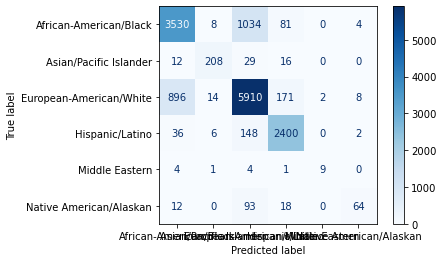

In [69]:
plot_confusion_matrix(logreg, Xsc_train, y_train, cmap='Blues');

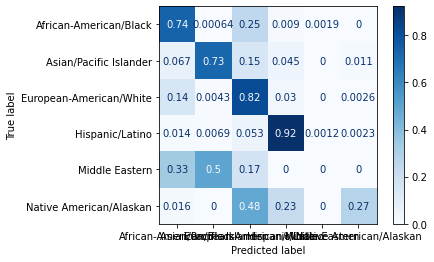

In [70]:
plot_confusion_matrix(logreg, Xsc_test, y_test, cmap='Blues', normalize='true');

### Evaluation recall score for logistic regression

In [71]:
recall_score(y_test, y_preds, average='weighted')

0.8029345832484206

In [72]:
### Evaluation precision score for logistic regression

In [73]:
precision_score(y_test, y_preds, average='weighted')

0.8005557843825003

In [74]:
### Evaluation F1 score for logistic regression

In [75]:
f1_score(y_test, y_preds, average='weighted')

0.8006055925166985

In [76]:
predprobs = logreg.predict_log_proba(Xsc_test)

In [77]:
predprobs

array([[ -5.07387926,  -6.66213702,  -1.32935517,  -0.9505424 ,
        -11.06992971,  -1.075085  ],
       [ -0.72643102,  -4.95175635,  -0.73521749,  -3.65639503,
         -9.21658155,  -5.52872922],
       [ -3.29159094,  -5.79923482,  -0.06520762,  -4.23959157,
         -5.68974696,  -5.27682184],
       ...,
       [ -0.87890397, -10.02006369,  -0.55354492,  -4.62635622,
        -12.27895215, -11.14021822],
       [ -4.83569299,  -7.32413885,  -0.0176923 ,  -4.74218241,
        -14.58400102,  -8.44002509],
       [ -1.58633335,  -8.41144928,  -0.36301194,  -2.80376334,
         -6.84553756,  -3.27335802]])

### Examining coefficients from the logistic regresion

In [78]:
coefficients = pd.DataFrame(list(zip(X.columns, np.exp(logreg.coef_)[0])))

In [79]:
coefficients.sort_values(by = 1, ascending=False, key = abs).head(10)

,0,1
184,pctblack,2.381574
130,unemployed_2017,2.023155
74,sales_2007,1.925037
70,private_nonfarm_establishments_2009,1.845359
77,fed_spending_2009,1.818185
24,black_2010,1.791341
64,persons_per_household_2017,1.673634
32,two_plus_races_2010,1.655088
198,State_FL,1.531944
199,State_GA,1.526401


### Ridge Classifier

In [80]:
rc = RidgeClassifier()

In [81]:
rc.fit(Xsc_train, y_train)

RidgeClassifier()

In [82]:
rc.score(Xsc_train, y_train)

0.8141430609333605

In [83]:
rc.score(Xsc_test, y_test)

0.8017118402282454

### K-Nearest Neighbors

In [84]:
knn = KNeighborsClassifier(n_neighbors=11)

In [85]:
knn.fit(Xsc_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [86]:
knn.score(Xsc_train, y_train)

0.7487942395217716

In [87]:
knn.score(Xsc_test, y_test)

0.7040961891175871

### Decision Tree

In [88]:
trees = DecisionTreeClassifier()
trees.fit(Xsc_train, y_train)

DecisionTreeClassifier()

In [89]:
trees.score(Xsc_train, y_train)

0.9999320698322125

In [90]:
trees.score(Xsc_test, y_test)

0.7122478092520889

### Random Forest

In [92]:
rf = RandomForestClassifier(max_depth = 10)

In [93]:
rf.fit(Xsc_train, y_train)

RandomForestClassifier(max_depth=10)

In [94]:
rf.score(Xsc_train, y_train)

0.8631207119081584

In [95]:
rf.score(Xsc_test, y_test)

0.7996739351946199

### Bagging Classifier

In [96]:
bag = BaggingClassifier(verbose=1)

In [97]:
bag.fit(Xsc_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.4s finished


BaggingClassifier(verbose=1)

In [98]:
bag.score(Xsc_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


0.9879084301338225

In [99]:
bag.score(Xsc_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0.7744039127776645

### Support Vector Machines

In [100]:
svec = SVC(verbose = True)

In [101]:
svec.fit(Xsc_train, y_train)

[LibSVM]

SVC(verbose=True)

In [102]:
svec.score(Xsc_train, y_train)

0.8409075470416412

In [103]:
svec.score(Xsc_test, y_test)

0.7990625636845323

### Ada Boost

In [104]:
ada = AdaBoostClassifier()

In [105]:
ada.fit(Xsc_train, y_train)

AdaBoostClassifier()

In [106]:
ada.score(Xsc_train, y_train)

0.672508661096393

In [107]:
ada.score(Xsc_test, y_test)

0.6786223761972692

### Extra Trees

In [108]:
xtra = ExtraTreesClassifier()

In [109]:
xtra.fit(Xsc_train, y_train)

ExtraTreesClassifier()

In [110]:
xtra.score(Xsc_train, y_train)

0.9999320698322125

In [111]:
xtra.score(Xsc_test, y_test)

0.7817403708987162

### Gradient Boost

In [112]:
gboost = GradientBoostingClassifier()

In [113]:
gboost.fit(Xsc_train, y_train)

GradientBoostingClassifier()

In [114]:
gboost.score(Xsc_train, y_train)

0.8516405135520685

In [115]:
gboost.score(Xsc_test, y_test)

0.809455879356022

### Xtra Gradient Boost

In [116]:
xgb_model = xgb.XGBClassifier(objective="multi:softmax", random_state=42)

In [117]:
xgb_model.fit(Xsc_train, y_train)

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:58:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
xgb_model.score(Xsc_train, y_train), xgb_model.score(Xsc_test, y_test)

(0.9790775083214456, 0.8053800692887711)